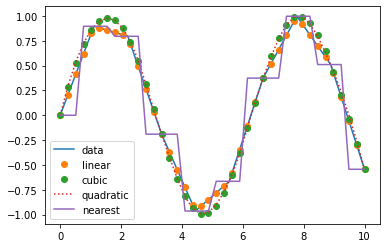

148.6665061401061

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy import stats

x = np.linspace(0, 10, num=10, endpoint=True)
#y = np.cos(-x**2/9.0)
y = np.sin(x)

f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
f3 = interp1d(x, y, kind='quadratic')
f4 = interp1d(x, y, kind='nearest')
xnew = np.linspace(0, 10, num=40, endpoint=True)

plt.plot(x, y) 
plt.plot(xnew, f(xnew), 'o') 
plt.plot(xnew, f2(xnew), 'o')
plt.plot(xnew, f3(xnew),':')
plt.plot(xnew, f4(xnew))

plt.legend(['data', 'linear', 'cubic','quadratic','nearest'], loc='best')
plt.show()


def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y, f2(xnew))

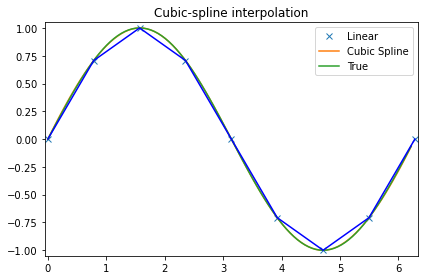

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

[0     -3.000000
1     -2.993326
2     -2.986652
3     -2.979978
4     -2.973304
         ...   
445   -0.030033
446   -0.023359
447   -0.016685
448   -0.010011
449   -0.003337
Name: # t, Length: 450, dtype: float64, 450    0.003337
451    0.010011
452    0.016685
453    0.023359
454    0.030033
         ...   
895    2.973304
896    2.979978
897    2.986652
898    2.993326
899    3.000000
Name: # t, Length: 450, dtype: float64]


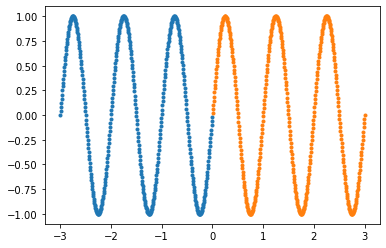

In [53]:
#Chunks
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv("sin.csv")
x = data['# t']
y = data['x']

chunks = 2
x_chunks = np.array_split(x, int(chunks))
y_chunks = np.array_split(y, int(chunks))

print(x_chunks)
y_chunks
plt.figure()
for i in range(chunks):
    plt.plot(x_chunks[i], y_chunks[i],'.')

In [154]:
from scipy.stats.stats import pearsonr   
a = [1,4,6]
b = [345,35,21]   
error = 1-(pearsonr(a,b)[0])
print(error*100)

193.21792547176196


In [3]:
#error-map
import matplotlib.pyplot as plt
a = [1,4,6]
b = [345,35,21]
error = []
for i in range(len(a)):
    error.append(abs(a[i]-b[i]))
error
#t= np.linspace(0, 344)
#plt.scatter(t, error, c ="blue")

[344, 31, 15]

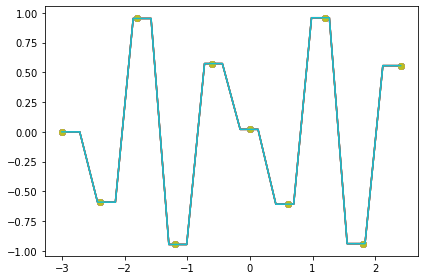

In [43]:
#El 7agat kolha m3 ba3d 

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd 
import more_itertools as mit 

plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
%matplotlib inline
import mpld3
mpld3.enable_notebook()

data = pd.read_csv("sin.csv")
x_data= data['# t']
y_data = data['x']

############################## take num of points from original data ##############
x=[]
y=[]
i=0
numpoints = 10
while(i<len(x_data)):
    x.append(x_data[i])
    y.append(y_data[i])
    i=i+(len(x_data)/numpoints)
#print(x)  
#print(y) 
############################## take num of points from original data ##############

f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
f3 = interp1d(x, y, kind='nearest')
xnew = np.linspace(x[0], x[len(x)-1], num=20, endpoint=True)


chunks = 5
n=int((len(x)-1)/chunks)
percentage= 0
if(percentage>=0 and percentage<=25):
    k=int((percentage/100)*((len(x)-1)/chunks))
    x_chunks = list(mit.windowed(x, n=int(len(x)/chunks), step=n-k))
    y_chunks = list(mit.windowed(y, n=int(len(x)/chunks), step=n-k)) 
    
for i in range(chunks):
    #plt.plot(x_chunks[i], y_chunks[i],'o')  
    plt.plot(x, y,'o') 
    plt.plot(xnew, f3(xnew))
#plt.plot(xnew, f(xnew),'-') 
#plt.plot(xnew, f2(xnew),'-')
#plt.plot(xnew, f3(xnew))

#plt.legend(['data', 'linear', 'cubic','nearest'], loc='best')
plt.show()


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
%matplotlib inline
import mpld3
mpld3.enable_notebook()
data = pd.read_csv("sin.csv")
x = data['# t']
y = data['x']
#xnew = np.linspace(x[0], x[len(x)-1], num=20000)

model = np.poly1d(np.polyfit(x, y, 5))
#ynew = model(x)
#print(ynew)
plt.plot(x, y, '.', xnew, model(xnew), '-' )
#plt.ylabel( str(model).strip())
plt.show()

print(str(model).strip())

NameError: name 'xnew' is not defined

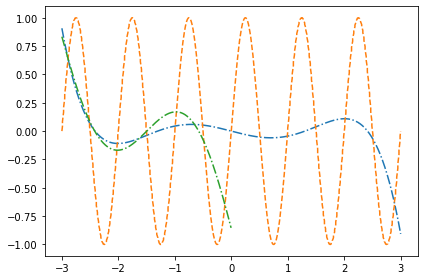

[[9.58743874e+11]
 [9.52074340e+11]
 [2.77292331e+12]
 [2.74900353e+12]
 [2.51816673e+12]]


TypeError: Input z must be at least a (2, 2) shaped array, but has shape (5, 1)

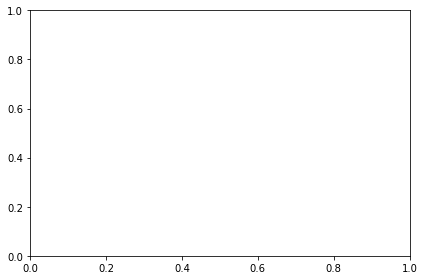

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import more_itertools as mit 

from sklearn.metrics import mean_absolute_percentage_error

plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True
%matplotlib inline
import mpld3
mpld3.enable_notebook()

data = pd.read_csv("sin.csv")
x_data = data['# t']
y_data = data['x']




#print(x)

chunks = 1

if(chunks==1):
    change = round(50 / 100 * len(x_data)) # changing 90%
    plt.plot(x_data, model(x_data), '-.')
else:
    change = round(100 / 100 * len(x_data)) # changing 90%

x = x_data[:change]  # change from last value towards beginning of array
y = y_data[:change]  # change from last value towards beginning of array    
    
n=int((len(x)-1)/chunks)
percentage= 0
if(percentage>=0 and percentage<=25):
    k=int((percentage/100)*((len(x)-1)/chunks))
    x_chunks = list(mit.windowed(x, n=int(len(x)/chunks), step=n-k))
    y_chunks = list(mit.windowed(y, n=int(len(x)/chunks), step=n-k)) 

degree = 5
model = np.poly1d(np.polyfit(x, y, degree))

plt.plot(x_data , y_data , '--')


for i in range(chunks):
    #plt.plot(x_chunks[i], y_chunks[i],'--')  
    plt.plot(x_chunks[i], model(x_chunks[i]), '-.')
#print(str(model).strip())
plt.show()

a=range(1,chunks+1)
b=range(1,degree+1)
xa, xb = np.meshgrid(a, b, sparse=True)  


#y_true = [2, 0, 10000, 54165]
#y_pred = [2., 0.0, 2, 8]
#print("Overall Error: ")
#error = mean_absolute_percentage_error(y_true, y_pred)
#print(error*100)

# print("Error from chunk 1 and current degree: ")
# print(mean_absolute_percentage_error(y_chunks[0], model(x_chunks[0])))
# print("Error from chunk 2 and current degree: ")
# print(mean_absolute_percentage_error(y_chunks[1], model(x_chunks[1])))
# print("Error from chunk 3 and current degree: ")
# print(mean_absolute_percentage_error(y_chunks[2], model(x_chunks[2])))

errors=[]
for i in range(1,degree+1):
    degrees = np.poly1d(np.polyfit(x, y, i))
    for j in range(chunks):
        errors.append(mean_absolute_percentage_error(y_chunks[j],degrees(x_chunks[j])))
#print(errors)    
errors_2d = np.reshape(errors, (degree, chunks))
print(errors_2d)  
plt.contourf(a,b,errors_2d)
plt.colorbar()  
plt.show()

In [40]:
from sklearn.metrics import mean_absolute_percentage_error

y_true = [0.041922206697346046, 0.08377070391497211, 0.12547191177244071, 0.16695250935996953]
y_pred = [0.16081911, 0.16020523, 0.1595929,  0.15898211]

mean_absolute_percentage_error(y_true, y_pred)

1.0170597641518864

[[0.72727273, 0.95454545, 1.0], [0.0, 1.0, 1.0], [0.57799014, 1.0, 1.0]]


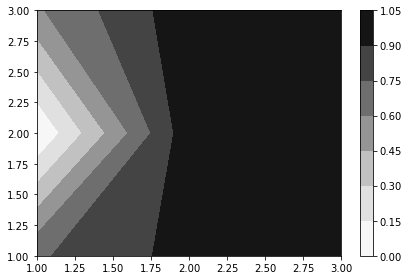

In [107]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

# data = pd.read_csv("sin.csv")
# a = data['# t']
# b = data['x']

a=[1,2,3]
b=[1,2,3]


xa, xb = np.meshgrid(a, b, sparse=True)  


z = [[0.72727273, 0.95454545, 1.    ],
    [0.     ,    1.      ,   1.        ],
    [0.57799014, 1.    ,     1.        ]] #controll colormap


print(z)
plt.contourf(a,b,z , cmap='Greys')
plt.colorbar()  
plt.show()

In [10]:
############################## take num of points from original data ##############
import numpy as np
import pandas as pd
data = pd.read_csv("sin.csv")
x_data= data['# t']
#x_data= [1,2,3,4,5,6,7,8,9]
x=[]
i=0
numpoints = 2
while(i<len(x_data)):
    x.append(x_data[i])
    i=i+(len(x_data)/numpoints)
print(x)   

[-3.0, 0.0033370411568411917]


In [23]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
change = round(90 / 100 * len(x)) # changing 90%
x_percentage = x[:change]  # change from last value towards beginning of array
print(x_percentage)

[1 2 3 4 5 6 7 8 9]


C:\Users\Lucifer\AppData\Local\Temp/ipykernel_8788/1557320169.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_title(label)


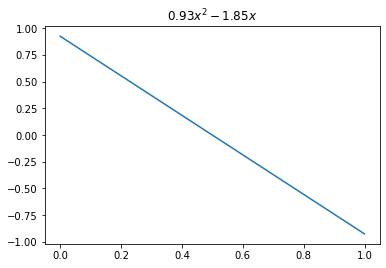

In [56]:
from sympy import S, symbols, printing
from matplotlib import pyplot as plt
import numpy as np

x=np.linspace(0,1,100)
y=np.sin(2 * np.pi * x)

p = np.polyfit(x, y, 2)
f = np.poly1d(p)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

xSymbols = symbols("x")
poly = sum(S("{:6.2f}".format(v))*xSymbols**i for i, v in enumerate(p[::1]))
eq_latex = printing.latex(poly)
label="${}$".format(eq_latex)

plt.plot(x_new, y_new)
plt.axes().set_title(label)
plt.show()

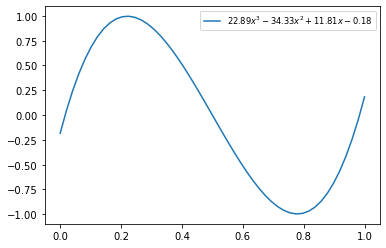

In [33]:
from sympy import S, symbols, printing
from matplotlib import pyplot as plt
import numpy as np

x=np.linspace(0,1,100)
y=np.sin(2 * np.pi * x)

p = np.polyfit(x, y, 3)
f = np.poly1d(p)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

x = symbols("x")
poly = sum(S("{:6.2f}".format(v))*x**i for i, v in enumerate(p[::-1]))
eq_latex = printing.latex(poly)

plt.plot(x_new, y_new, label="${}$".format(eq_latex))
plt.legend(fontsize="small")
plt.show()